# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Philipp Schmidt

Datum: 22.11.2023

Gruppe: 16

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie kann man die Wärmekapzität eines Behäter Wassers messen? 
Welchen Versuchsaufbau braucht man?

## Versuchsaufbau und Durchführung

Für den Versuch werden folgende Materialien genutzt:
1 Glas 0,5l, 
1 Glas 0,25l, 
2 Temperatursensoren, 
Verkabelung für die Sensoren und Auswertungscomputer (Pi)

Für den Versuch wird in Vorhinein das kleine Glas mit 0,25l kaltem Wasser gefüllt und in das große umgefüllt, anschließend wird das kleine Glas mit 0,25l heißem Wasser gefüllt (kaltes und warmes Wasser beziehen sich auf die kälteste und wärmste am Wasserhahn zapfbare Temperatur). Anschließend wird in das große Glas mit dem kalten und das kleine Glas mit warmem Wasser je ein Temperatursensor gelegt und das Messprogramm gestartet.
Danach wird das warme Glas Wasser inkl. Temperatursensor in das Kalte geschüttet. Die Temperaturen von beiden sensoren wird dabei über die gesamte Zeit aufgenommen, bis sich eine konstante Temperatur an beiden Sensoren eingestellt hat.

<img src="figures/IMG_3145.jpg" width="800">
<img src="figures/IMG_3146.jpg" width="800">

## Versuchsauswertung

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")

### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [12]:
path_data_capacity = "data/versuch1/versuch1.h5"

In [13]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

with h5.File("data/versuch1/versuch1.h5") as f:
    # save data from experiment in variable h5_data_....
    h5_data_temp_s_1 = f["RawData/1ee86452-5a89-6206-b978-780bff57ae1b/temperature"]
    h5_data_time_s_1 = f["RawData/1ee86452-5a89-6206-b978-780bff57ae1b/timestamp"]
    h5_data_temp_s_2 = f["RawData/1ee86454-105f-6f4f-aa3b-a68f34269088/temperature"]
    h5_data_time_s_2 = f["RawData/1ee86454-105f-6f4f-aa3b-a68f34269088/timestamp"]
    
    #safe in arrays for plotting
    temp_s_1_array = np.array(h5_data_temp_s_1)
    time_s_1_array = np.array(h5_data_time_s_1)
    temp_s_2_array = np.array(h5_data_temp_s_2)
    time_s_2_array = np.array(h5_data_time_s_2)
    
# DONE #



#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


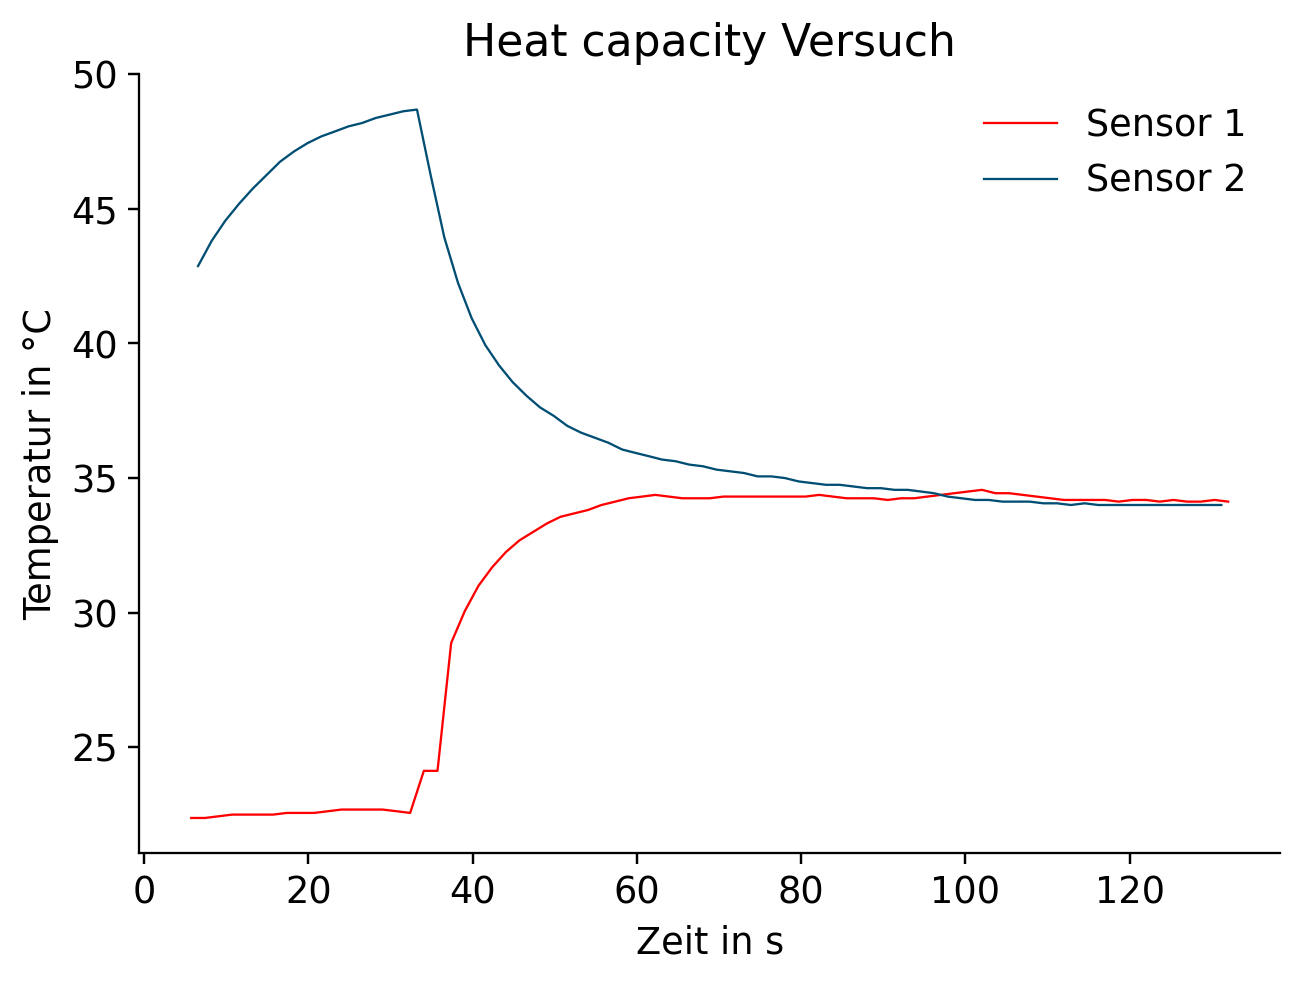

In [14]:

# TODO: Use the temperature and time data for plotting

plt.plot(time_s_1_array, temp_s_1_array, color='red')
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.plot(time_s_2_array, temp_s_2_array)
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")

plt.title("Heat capacity Versuch")
plt.legend(['Sensor 1', 'Sensor 2'])

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [18]:
# Heat capacity of Water
water_heat_capa = 4.18 

# Read mass from the metadata of the experiment.
import json
with open("data/versuch1/probe_heat_capacity_1ee8644f-5f88-66c8-83c1-ec9fa201845d.json") as jf:
          g = json.load(jf)
mass = g['probe']['metadata']
print(mass)

# DONE #

500


#### (iV) Anfangs- und Endwert der Temperatur

In [38]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity

t_1_hot = max(temp_s_1_array)
t_2 = temp_s_2_array[0]

t_m = ((temp_s_1_array[63]+temp_s_2_array[62])/2) # Mischungstemp. errechnen.


print(t_1_hot, '°C')
print(t_2, '°C')
# DONE #

34.5625 °C
42.875 °C


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [39]:
# TODO: Calculate heat capacity of the calorimeter

C = ((250*water_heat_capa*(t_1_hot-t_m))/(t_m-t_2_low))-250*water_heat_capa

# DONE #

#### (Vi) Ergebnis

In [40]:
# TODO: Print result

print(C, 'J/K')

# DONE #

1672.0 J/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Da sich der Sensor im warmen Wasser zu Beginn noch aufheizt wird es Wohl zu einer leichten Verfläschung der Messergebnisse gekommen sein. Meine Wärmekapzität fällt mit 1672J/K unerwartet hoch aus.


## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [ ]:
Ich weiß nun wie man Sensoren über eine Funktion in Python ansprechen kann. Außerdem habe ich gelernt man das Wissen aus TTD1 im Realen Messumfeld einsetzt.